<a href="https://colab.research.google.com/github/ilyes-frag/Sentiment-analysis-with-Hugging-face/blob/main/chapter_2_book_hugging_face_(sentiment_analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install transformers


     |████████████████████████████████| 3.8 MB 3.7 MB/s 
     |████████████████████████████████| 67 kB 2.5 MB/s 
     |████████████████████████████████| 6.6 MB 31.4 MB/s 
     |████████████████████████████████| 895 kB 30.9 MB/s 
     |████████████████████████████████| 596 kB 36.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
pip install transformers[torch]


In [3]:
pip install git+https://github.com/huggingface/transformers


  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-wrhbahjd
  Running command git clone -q https://github.com/huggingface/transformers /tmp/pip-req-build-wrhbahjd
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for transformers: filename=transformers-4.18.0.dev0-py3-none-any.whl size=3957471 sha256=a442b8ec357455abaac946cb76c63810bc98fe1903a75ca93b3e41be0660aa2e
  Stored in directory: /tmp/pip-ephem-wheel-cache-z2eki93g/wheels/35/2e/a7/d819e3310040329f0f47e57c9e3e7a7338aa5e74c49acfe522
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.17.0
    Uninstalling transformers-4.17.0:
      Successfully uninstalled transformers-4.17.0


In [4]:
pip install datasets


     |████████████████████████████████| 325 kB 5.3 MB/s 
     |████████████████████████████████| 1.1 MB 46.4 MB/s 
     |████████████████████████████████| 136 kB 48.0 MB/s 
     |████████████████████████████████| 212 kB 52.5 MB/s 
     |████████████████████████████████| 127 kB 45.6 MB/s 
     |████████████████████████████████| 271 kB 52.2 MB/s 
     |████████████████████████████████| 94 kB 2.9 MB/s 
     |████████████████████████████████| 144 kB 35.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.




# 1-load the dataset
  we are going to use the emotion dataset from hugging face 

In [5]:
from datasets import list_datasets
all_datasets=list_datasets()
print(f"there are {len(all_datasets)} datasets currently available on the hub ")
print(f"the first 10 are :{all_datasets[:10]}")

there are 3866 datasets currently available on the hub 
the first 10 are :['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [6]:
from datasets import load_dataset
emotion=load_dataset("emotion")

Using custom data configuration default


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [7]:
emotion

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [8]:
train_ds=emotion["train"]

In [9]:
len(train_ds)

16000

In [10]:
train_ds[0]

{'label': 0, 'text': 'i didnt feel humiliated'}

In [11]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [12]:
#print the first 5 rows 
train_ds[:5]

{'label': [0, 0, 3, 2, 3],
 'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy']}

###<font color='green'> from dataset to dataframe(pandas)

In [13]:
import pandas as pd
emotion.set_format(type='pandas')
df=emotion['train'][:]

In [14]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


the labels are represented as integers;so let's use the int2str()methode of the label feature to creat a new column in our Dataframe with the corresponding label names

In [15]:
def label_int2str(row):
  return emotion["train"].features["label"].int2str(row)
df["label_name"]=df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


### <font color='green'>Looking at the class distribution

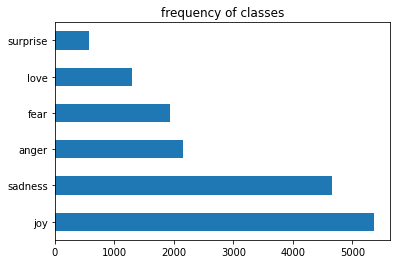

In [16]:
import matplotlib.pyplot as plt
df["label_name"].value_counts().plot.barh()
plt.title('frequency of classes')
plt.show()

### <font color='green'>How long are our tweets?

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


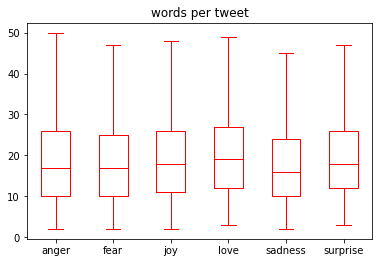

In [17]:
df["words per tweet"]=df["text"].str.split().apply(len)
df.boxplot("words per tweet",by="label_name",grid=False,showfliers=False,color="red")
plt.suptitle("")
plt.xlabel("")
plt.show()

look at the boxplot we can see the size of the sentence is around 50 words,than we can use a smaller model to bert who is DistilBert

let's reset our dataset since we dont need dataframe anymore

In [18]:
emotion.reset_format()


 ### 2-Frome Text To Tokens(Tokenization) 
BERT and DistilBERT use the subwords tokenization
the basics idea behind the subword tokenization is to combine  the best aspects of charachter and word tokenization. On the one hand,we want to split rare words into smaller units to allow the model to deal with complex words and misspellings.on the other hand,we want to keep frequent words as unique entities so that we can keep the length of our inputs to a manageable size.

In [19]:
from transformers import AutoTokenizer
model_ckpt="distilbert-base-uncased"
#initiate the tokenizer
tokenizer=AutoTokenizer.from_pretrained(model_ckpt)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

or we can  load directly the distilbert tokenizer 

In [20]:
from transformers import DistilBertTokenizer
distilbert_tokenizer=DistilBertTokenizer.from_pretrained(model_ckpt)

let's tokenize some exemple

In [21]:
#let's look at how tokinizer works 
text="tokenizing text is a core task of nlp"
encoded_text=tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [22]:
#Now we have the input_ids we can convert the input_ids into tokens 
token=tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(token)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '[SEP]']


### <font color='green'> Tokenizing the whole Dataset


In [23]:
def tokenize(batch):
  
  return tokenizer(batch["text"],padding=True,truncation=True)

In [24]:
tokenize(emotion["train"][:2])

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [25]:
emotion["train"][:2]

{'label': [0, 0],
 'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake']}

In [26]:
emotions_encoded=emotion.map(tokenize,batched=True,batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [27]:
print(emotions_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


In [28]:
emotions_encoded["train"][0]

{'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'input_ids': [101,
  1045,
  2134,
  2102,
  2514,
  26608,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'label': 0,
 'text': 'i didnt feel humiliated'}

# 3-Training a text classifier

### <font color='green'> Tensorflow versionn---

In [29]:
#from transformers import TFAutoModel
#tf_model=TFAutoModel.from_pretrained(model_ckpt)


### <font color='green'> torch version

In [30]:
import torch
from transformers import AutoModel

In [31]:
from transformers import AutoModel
model_ckpt="distilbert-base-uncased"
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=AutoModel.from_pretrained(model_ckpt).to(device)

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


lets extract the hidden_states for the whole dataset

In [32]:
def extract_hidden_states(batch):
  #place the model inputs on the gpu
  inputs={k:v.to(device) for k,v in batch.items()
  if k in tokenizer.model_input_names}
  #extract last hidden states
  with torch.no_grad():
    last_hidden_state=model(**inputs).last_hidden_state
  #return vector for [CLS] token
  return{"hidden_state":last_hidden_state[:,0].cpu().numpy()}

In [33]:
#Since our model expect tensors as inputs,so we convert the inputs_ids and the attention_mask to torch format
emotions_encoded.set_format("torch",
                            columns=["input_ids","attention_mask","label"])

In [34]:
#then we go ahead and extract the hidden states across all splits in one go:
emotions_hidden=emotions_encoded.map(extract_hidden_states,batched=True)

  0%|          | 0/16 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [35]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

Creating a feature matrix 
the preprocessed dataset now contains all the information we need to train a classifier on it.We wikk use the hidden states as input features and the labels as targets.

In [36]:
import numpy as np
X_train=np.array(emotions_hidden["train"]["hidden_state"])
X_validation=np.array(emotions_hidden["validation"]["hidden_state"])
y_train=np.array(emotions_hidden["train"]["label"])
y_validation=np.array(emotions_hidden["validation"]["label"])
X_train.shape,X_validation.shape

((16000, 768), (2000, 768))

### <font color='green'>Visualizing the training set 

In [37]:
pip install umap-learn

     |████████████████████████████████| 86 kB 3.1 MB/s 
     |████████████████████████████████| 1.1 MB 28.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=2cc48e32720cefa7682bca5a007476eecf9086d4d0f90e0c7e4a755b3e927394
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=8f7f2eff0e516276db098058ef44ff54da4d556cc6a3c9acd42f704b1995d5af
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


In [ ]:
#UMAP is a powerful algorithme to project the vectors down to 2D,Since UMAP works best when the features are scales to lie in the [0,1]interval.
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler
#scale the features to [0,1]range 
X_scaled=MinMaxScaler().fit_transform(X_train) 
#initialize anf fit UMAP
mapper=UMAP(n_components=2,metric="cosine").fit(X_scaled)
#creat a dataframe of 2d embeddings
df_emb=pd.DataFrame(mapper.embedding_,columns=["X","Y"])
df_emb["label"]=y_train
df_emb.head()

In [ ]:
fig,axes=plt.subplots(2,3,figsize=(7,5))
axes=axes.flatten()
cmaps=["Greys", "Blues" ,"Oranges", "Reds" ,"Purples","Greens"]
labels=emotion["train"].features["label"].names

for i,(label,cmap) in enumerate(zip(labels,cmaps)):
  df_emb_sub=df_emb.query(f"label=={i}")
  axes[i].hexbin(df_emb_sub["X"],df_emb_sub["Y"],cmap=cmap,
                 gridsize=20,linewidths=(0,))
  axes[i].set_title(label)
  axes[i].set_xticks([]),axes[i].set_yticks([])

plt.tight_layout()
plt.show()

### <font color='green'> Training a simple classifier

In [ ]:
#training a simple logisticregression for classification 
#we increase the 'max_iter' to guarantee convergence
from sklearn.linear_model import LogisticRegression
lr_clf= LogisticRegression(max_iter=3000)
lr_clf.fit(X_train,y_train)
lr_clf.score(X_validation,y_validation)

In [ ]:
#we can build a classifier with simple heuristics such as always choosing with DummyClassifier
from sklearn.dummy import DummyClassifier
dummy_clf=DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train,y_train)
dummy_clf.score(X_validation,y_validation)

SO, our simple classifier with DistilBERT embeddings is significantly better than our baseline.

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from IPython.core.pylabtools import figsize
#lets see the confusionmatrix
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
def plt_confusion_matrix(y_preds,y_true,labels):
  cm=confusion_matrix(y_true,y_preds,normalize="true")
  fig,ax=plt.subplots(figsize=(6,6))
  disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
  disp.plot(cmap="Blues",values_format=".2f",ax=ax,colorbar=False)
  plt.title("Normalized confusion Matrix")
  plt.show()


y_preds=lr_clf.predict(X_validation)
plt_confusion_matrix(y_preds,y_validation,labels)


# 4- Fine-Tunning Transformers
in the next section we  will explore the fine tunning approach,wich lead to superior classification perfrormance.

### <font color='green'> Loading a pretained model

In [ ]:
# instead of using a Automodel we use a AutoModelForSequenceClassification 
from transformers import AutoModelForSequenceClassification
num_labels=6
model=(AutoModelForSequenceClassification.from_pretrained(model_ckpt,num_labels=num_labels).to(device))

### <font color='green'>Define the performance metrics
for our applicaton we'll compute the F1 score and the accuracy of the model 

In [ ]:
from sklearn.metrics import accuracy_score,f1_score

def compute_metrics(pred):
  labels=pred.label_ids
  preds=pred.predictions.argmax(-1)
  f1=f1_score(labels,preds,average="weighted")
  acc=accuracy_score(labels,preds)
  return{"accuracy":acc,"f1":f1}

### <font color='green'> Training the model
to define the training parameters,we use the TrainingArgulents class.

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
from transformers import Trainer,TrainingArguments
batch_size=64
logging_steps=len(emotions_encoded["train"])//batch_size
model_name=f"{model_ckpt}-finetuned-emotion"
training_args=TrainingArguments(output_dir=model_name,
                                num_train_epochs=2,
                                learning_rate=2e-5,
                                per_device_train_batch_size=batch_size,
                                per_device_eval_batch_size=batch_size,
                                weight_decay=0.01,
                                evaluation_strategy="epoch",
                                disable_tqdm=False,
                                logging_steps=logging_steps ,
                                push_to_hub=True,
                                log_level="error")

In [ ]:
!curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash
!sudo apt-get install git-lfs
!git lfs install
!git clone https://github.com/snap-research/articulated-animation/

In [ ]:
from transformers import Trainer
trainer=Trainer(model=model,args=training_args,
              compute_metrics=compute_metrics,
              train_dataset=emotions_encoded["train"],
              eval_dataset=emotions_encoded["validation"],
              tokenizer=tokenizer)
trainer.train();

In [ ]:
preds_output=trainer.predict(emotions_encoded["validation"])

In [ ]:
preds_output.metrics

In [ ]:
y_preds=np.argmax(preds_output.predictions,axis=1)

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plt_confusion_matrix(y_preds,y_validation,labels)

### <font color='red'>  fine-Tuning with keras 

In [ ]:

#from transformers import TFAutoModelForSequenceClassification
#tf_model=(TFAutoModelForSequenceClassification.from_pretrained(model_ckpt,num_labels=num_labels))
####

In [ ]:
"""
# the columns names to convert to Tensorflow tensors 
tokenizer_columns=tokenizer.model_input_names
tf_train_dataset=emotions_encoded["train"].to_tf_dataset(columns=tokenizer_columns,label_cols=["label"],shuffle=True,batch_size=batch_size)
tf_eval_dataset=emotions_encoded["validation"].to_tf_dataset(columns=tokenizer_columns,label_cols=["label"],shuffle=False,batch_size=batch_size)
import tensorflow as tf 
tf_model.compile(optimizer=tf.keras.optimizer.Adam(learning_rate=5e-5),
                 loss=tf.keras.losses.SparsCategoricalCrossentropy(from_logits=True),
                 metrics=tf.metrics.SparseCategoricalAccuracy()
                 
                 
                 )

"""""

In [ ]:
#tf_model.fit(tf_train_dataset,validation_data=tf_eval_dataset,epochs=2)

### <font color='green'> Error analysis
we should investigate our model's predictions a little bit further.A simple yet powerful technique is to sort the validation samples by the model loss.

In [ ]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch) :
  #place all input tensors on the same device as the model 
  inputs={k:v.to(device)for k,v in batch.items() 
         if k in tokenizer.model_input_names}
  with torch.no_grad():
    output=model(**inputs)
    pred_label=torch.argmax(output.logits,axis=-1)
    loss=cross_entropy(output.logits,batch["label"].to(device),reduction="none")
    #place outputs on CPU for compatibility with other dataset columns
  return{"loss":loss.cpu().numpy(),"predicted_label":pred_label.cpu().numpy()}

In [ ]:
emotions_encoded.set_format("torch",columns=["input_ids","attention_mask","label"])

In [ ]:
emotions_encoded

In [ ]:
emotions_encoded["validation"]=emotions_encoded["validation"].map(forward_pass_with_label,batched=True,batch_size=16)

In [ ]:
emotions_encoded.set_format("pandas")
cols=["text","label","predicted_label","loss"]
df_test=emotions_encoded["validation"][:][cols]
df_test["label"]=df_test["label"].apply(label_int2str)
df_test["predicted_label"]=(df_test["predicted_label"].apply(label_int2str))

In [ ]:
df_test.sort_values("loss",ascending=False).head(20)

In [ ]:
df_test.sort_values("loss",ascending=True).head(20)

# 5-saving and sharing a model 
we will use the trainer API 


In [ ]:
#push the model to the HUB 
trainer.push_to_hub(commit_message="training completed")

In [ ]:
#Since w've pushed our model to the HUb,we can now use it with the pipeline 
from transformers import pipeline
model_id="loulou/distilbert-base-uncased-finetuned-emotion"
classifier=pipeline("text-classification",model=model_id)

In [ ]:
#then let's test the pipeline with a simple tweet :
custom_tweet="wooow im impressive "
preds=classifier(custom_tweet,return_all_scores=True)

In [ ]:
preds_df=pd.DataFrame(preds[0])
plt.bar(labels,100*preds_df["score"],color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("class probability(%)")
plt.show()